In [1]:
!conda env list

# conda environments:
#
base                     /home/samuel/anaconda3
py374                 *  /home/samuel/anaconda3/envs/py374



In [31]:
# set up
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim
seed = 1
seed_data = 10

import os
import sys
import ot 
import torch 

# Set wd
print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/snpla/seq-posterior-approx-w-nf-dev/')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/')

sys.path.append('./')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np


/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev


In [32]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


In [4]:
# set width to full screen
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [33]:
# set style
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [34]:
def read_posterior_samples(path):
    return np.loadtxt(path, delimiter=",")


def calc_emd(ref_data_set, data_set, p = 2):
    
    # from https://pythonot.github.io/quickstart.html#optimal-transport-and-wasserstein-distance
    
    n = ref_data_set.shape[0]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    
    if p == 2:
        
        M = ot.dist(ref_data_set, data_set)
    
        return np.sqrt(ot.emd2(a, b, M))
    
    elif p == 1:
        
        M = ot.dist(ref_data_set, data_set, metric='euclidean')
    
        return ot.emd2(a, b, M)

    
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

In [35]:
seed_max = 10
nbr_rounds = 10
seed_data = 10
nbr_samples = 10

## Read results 

In [36]:
snl_res = np.zeros((3,nbr_samples))

for i in range(nbr_samples):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + '_' + str(i+1)
    p = 'two_moons/hp_tuning/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [37]:
snpe_c_res = np.zeros((4,nbr_samples))

for i in range(nbr_samples):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + '_' + str(i+1)
    p = 'two_moons/hp_tuning/snpec_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [38]:
snpla_res = np.zeros((7,nbr_samples))

for i in range(nbr_samples):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + '_' + str(i+1)
    p = 'two_moons/hp_tuning/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [39]:
snre_b_res = np.zeros((4,nbr_samples))

for i in range(nbr_samples):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + '_' + str(i+1)
    p = 'two_moons/hp_tuning/snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

### Load posterior samples 

In [10]:
nbr_rounds

10

In [40]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snl_post_round_i = []
    for j in range(nbr_samples):
        id_job = str(i+1) + '_' + str(2) + '_' + str(11) + '_' + str(10) + '_' + str(j+1)
        p = 'two_moons/hp_tuning/snl_posterior_'+ id_job + '.csv'
        snl_post_round_i.append(read_posterior_samples(p))
            
    snl_post.append(snl_post_round_i)
        

In [41]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(nbr_samples):
        id_job = str(i+1) + '_' + str(2) + '_' + str(11) + '_' + str(10) + '_' + str(j+1)
        p = 'two_moons/hp_tuning/post_samples_snpec_'+ id_job + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [42]:
snre_b_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snre_b_post_round_i = []
    for j in range(nbr_samples):
        id_job = str(i+1) + '_' + str(2) + '_' + str(11) + '_' + str(10) + '_' + str(j+1)
        p = 'two_moons/hp_tuning/post_samples_snre_b_' + id_job + '.csv'
        snre_b_post_round_i.append(read_posterior_samples(p))
            
    snre_b_post.append(snre_b_post_round_i)

In [43]:
snpla_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpla_post_round_i = []
    for j in range(nbr_samples):
        id_job = str(i+1) + '_' + str(2) + '_' + str(11) + '_' + str(10) + '_' + str(j+1)
        p = 'two_moons/hp_tuning/post_samples_snpla_' + id_job + '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))
            
    snpla_post.append(snpla_post_round_i)

In [44]:
p = 'two_moons/data/true_posterior_' + str(dim)  + '_' + str(1) + '.csv'
analytical_post = read_posterior_samples(p)

## Calc emd for each approx posterior and plot posteriors

In [45]:
power = 1

In [46]:
nbr_rounds = 10

In [47]:
snl_post_emd = np.zeros((nbr_rounds,nbr_samples))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snl_post_emd[i,j] = calc_emd(analytical_post,snl_post[i][j], power)
    
    

0
1
2
3
4
5
6
7
8
9


In [48]:
snpe_c_post_emd = np.zeros((nbr_rounds,nbr_samples))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snpe_c_post_emd[i,j] = calc_emd(analytical_post,snpe_c_post[i][j], power)         
        #snpe_c_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpe_c_post[i][j])).item()         


0
1
2
3
4
5
6
7
8
9


In [49]:
snre_b_post_emd = np.zeros((nbr_rounds,nbr_samples))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snre_b_post_emd[i,j] = calc_emd(analytical_post,snre_b_post[i][j], power)         
        #snpe_c_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpe_c_post[i][j])).item()         


0
1
2
3
4
5
6
7
8
9


In [50]:
snpla_post_emd = np.zeros((nbr_rounds,nbr_samples))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snpla_post_emd[i,j] = calc_emd(analytical_post,snpla_post[i][j], power)         
        #snpla_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpla_post[i][j])).item()         


0
1
2
3
4
5
6
7
8
9


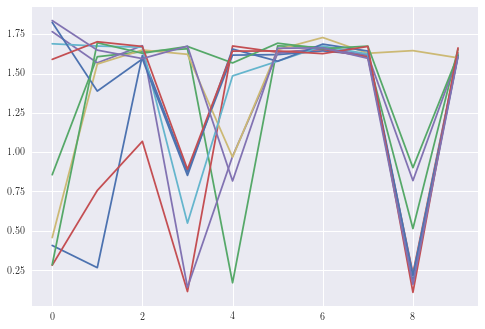

In [22]:
plt.figure()
plt.plot(snl_post_emd);

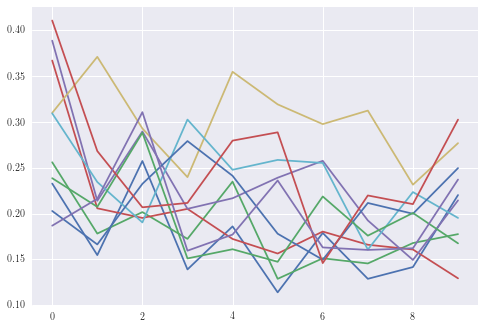

In [23]:
plt.figure()
plt.plot(snpe_c_post_emd);

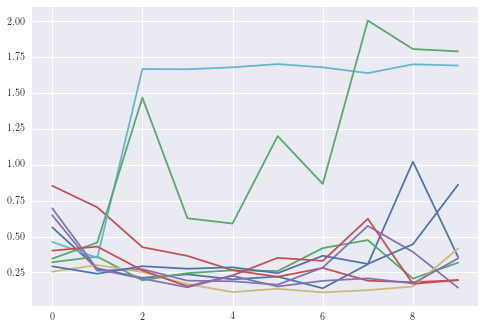

In [24]:
plt.figure()
plt.plot(snpla_post_emd);

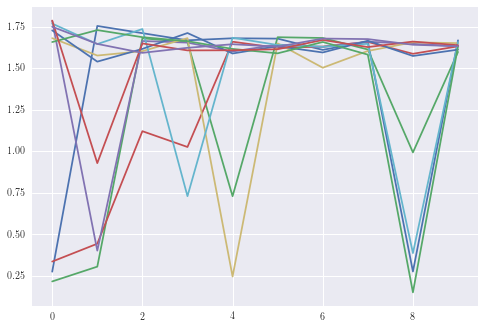

In [25]:
plt.figure()
plt.plot(snre_b_post_emd);

In [51]:
print("Optimla hp for SNL: " + str(snl_res[-1,np.argmin(snl_post_emd[-1, :])]))
print("Optimla hp for SNPE-C: " + str(snpe_c_res[1,np.argmin(snpe_c_post_emd[-1, :])]))
print("Optimla hp for SNPLA: " + str(snpla_res[1:5,np.argmin(snpla_post_emd[-1, :])]))
print("Optimla hp for SNRE-B: " + str(snre_b_res[1,np.argmin(snre_b_post_emd[-1, :])]))

Optimla hp for SNL: 0.008319
Optimla hp for SNPE-C: 0.000142
Optimla hp for SNPLA: [0.00564  0.005635 0.8182   0.713001]
Optimla hp for SNRE-B: 0.006185


In [118]:
snl_res[-1, :]

array([0.0005  , 0.006185, 0.000142, 0.00564 , 0.008319, 0.005765,
       0.005396, 0.006019, 0.006592, 0.004635])

In [119]:
snre_b_res[1,:]

array([0.007601, 0.006185, 0.000142, 0.00564 , 0.008319, 0.005765,
       0.005396, 0.006019, 0.006592, 0.004635])

In [120]:
snpe_c_res[1,:]

array([0.0005  , 0.006185, 0.000142, 0.00564 , 0.008319, 0.005765,
       0.005396, 0.006019, 0.006592, 0.004635])

In [116]:

for i in range(10):
    print(snpla_res[1:5,i])
    

[0.001 0.001 0.95  0.8  ]
[0.006185 0.003872 0.926786 0.792338]
[1.42000e-04 1.14500e-03 8.56883e-01 6.58086e-01]
[0.00564  0.005635 0.8182   0.713001]
[0.008319 0.001348 0.980586 0.895978]
[0.005765 0.005583 0.996379 0.832409]
[0.005396 0.002068 0.931183 0.847067]
[0.006019 0.008468 0.988336 0.738959]
[0.006592 0.00309  0.895499 0.883212]
[0.004635 0.00488  0.862187 0.834507]


In [52]:
print("SNL:")
print("Min: " + str(np.min(snl_post_emd[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snl_post_emd[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snl_post_emd[-1, :])))
print("---")
print("SNPE-C:")
print("Min: " + str(np.min(snpe_c_post_emd[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpe_c_post_emd[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpe_c_post_emd[-1, :])))
print("---")
print("SNPLA:")
print("Min: " + str(np.min(snpla_post_emd[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpla_post_emd[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpla_post_emd[-1, :])))
print("---")
print("SNRE-B:")
print("Min: " + str(np.min(snre_b_post_emd[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snre_b_post_emd[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snre_b_post_emd[-1, :])))

SNL:
Min: 1.599607733692073
Q1, Q2, Q3: [1.61175458 1.61583502 1.62946415]
Max: 1.662706660247106
---
SNPE-C:
Min: 0.12920084983067073
Q1, Q2, Q3: [0.18190877 0.21726166 0.24649801]
Max: 0.30257681357398764
---
SNPLA:
Min: 0.14443735623511553
Q1, Q2, Q3: [0.22769081 0.35298781 0.74939788]
Max: 1.7886945477872316
---
SNRE-B:
Min: 1.6000720563814355
Q1, Q2, Q3: [1.63402557 1.63430876 1.64992504]
Max: 1.6699971217179925


In [53]:
print(np.quantile(snl_post_emd[-1, :], [0.25, 0.75]).round(3))
print(np.quantile(snpe_c_post_emd[-1, :], [0.25, 0.75]).round(3))
print(np.quantile(snpla_post_emd[-1, :], [0.25, 0.75]).round(3))
print(np.quantile(snre_b_post_emd[-1, :], [0.25, 0.75]).round(3))

[1.612 1.629]
[0.182 0.246]
[0.228 0.749]
[1.634 1.65 ]


In [54]:
print(np.quantile(snl_post_emd[-1, :], [0.5]).round(3))
print(np.quantile(snpe_c_post_emd[-1, :], [0.5]).round(3))
print(np.quantile(snpla_post_emd[-1, :], [0.5]).round(3))
print(np.quantile(snre_b_post_emd[-1, :], [0.5]).round(3))
print("---")
print(np.diff(np.quantile(snl_post_emd[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpe_c_post_emd[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpla_post_emd[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snre_b_post_emd[-1, :], [0.25, 0.75])).round(3))


[1.616]
[0.217]
[0.353]
[1.634]
---
[0.018]
[0.065]
[0.522]
[0.016]


In [55]:
print((0.75*np.diff(np.quantile(snl_post_emd[-1, :], [0.25, 0.75]))/np.quantile(snl_post_emd[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpe_c_post_emd[-1, :], [0.25, 0.75]))/np.quantile(snpe_c_post_emd[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpla_post_emd[-1, :], [0.25, 0.75]))/np.quantile(snpla_post_emd[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snre_b_post_emd[-1, :], [0.25, 0.75]))/np.quantile(snre_b_post_emd[-1, :], [0.5])).round(3))


[0.008]
[0.223]
[1.108]
[0.007]


In [92]:
snre_b_post_emd[-2, :]

array([0.68872855, 0.68872855, 0.68872855, 0.68872855, 0.68872855,
       0.68872855, 0.68872855, 0.68872855, 0.68872855, 0.68872855])

In [91]:
snpe_c_post_emd[-2, :]

array([0.19731042, 0.19731042, 0.19731042, 0.19731042, 0.19731042,
       0.19731042, 0.19731042, 0.19731042, 0.19731042, 0.19731042])

In [89]:
snpla_post_emd[-1, :]

array([0.16474893, 1.64718995, 0.22924927, 1.62450055, 1.59253757,
       1.59461034, 1.60056636, 1.66213919, 0.32040151, 1.64661843])

In [38]:
print("SMC-ABC: " + str(smcabc_post_emd.mean(axis=1).round(4)))
print("SNL: " + str(snl_post_emd.mean(axis=1).round(4)))
print("SNPE-C: " + str(snpe_c_post_emd.mean(axis=1).round(4)))
print("SNRE-B: " + str(snre_b_post_emd.mean(axis=1).round(4)))
print("SNPLA: " + str(snpla_post_emd.mean(axis=1).round(4)))

SMC-ABC: [0.4016 0.3537 0.3665 0.3659 0.3575]
SNL: [1.1636 1.2685 1.2958 1.2876 1.5547]
SNPE-C: [0.2761 0.2338 0.209  0.1915 0.1802]
SNRE-B: [1.0935 1.1908 1.0767 1.0368 1.3568]
SNPLA: [0.3581 0.348  0.6299 0.7309 0.802 ]


#### Plotting - estimated Wasserstien dist 

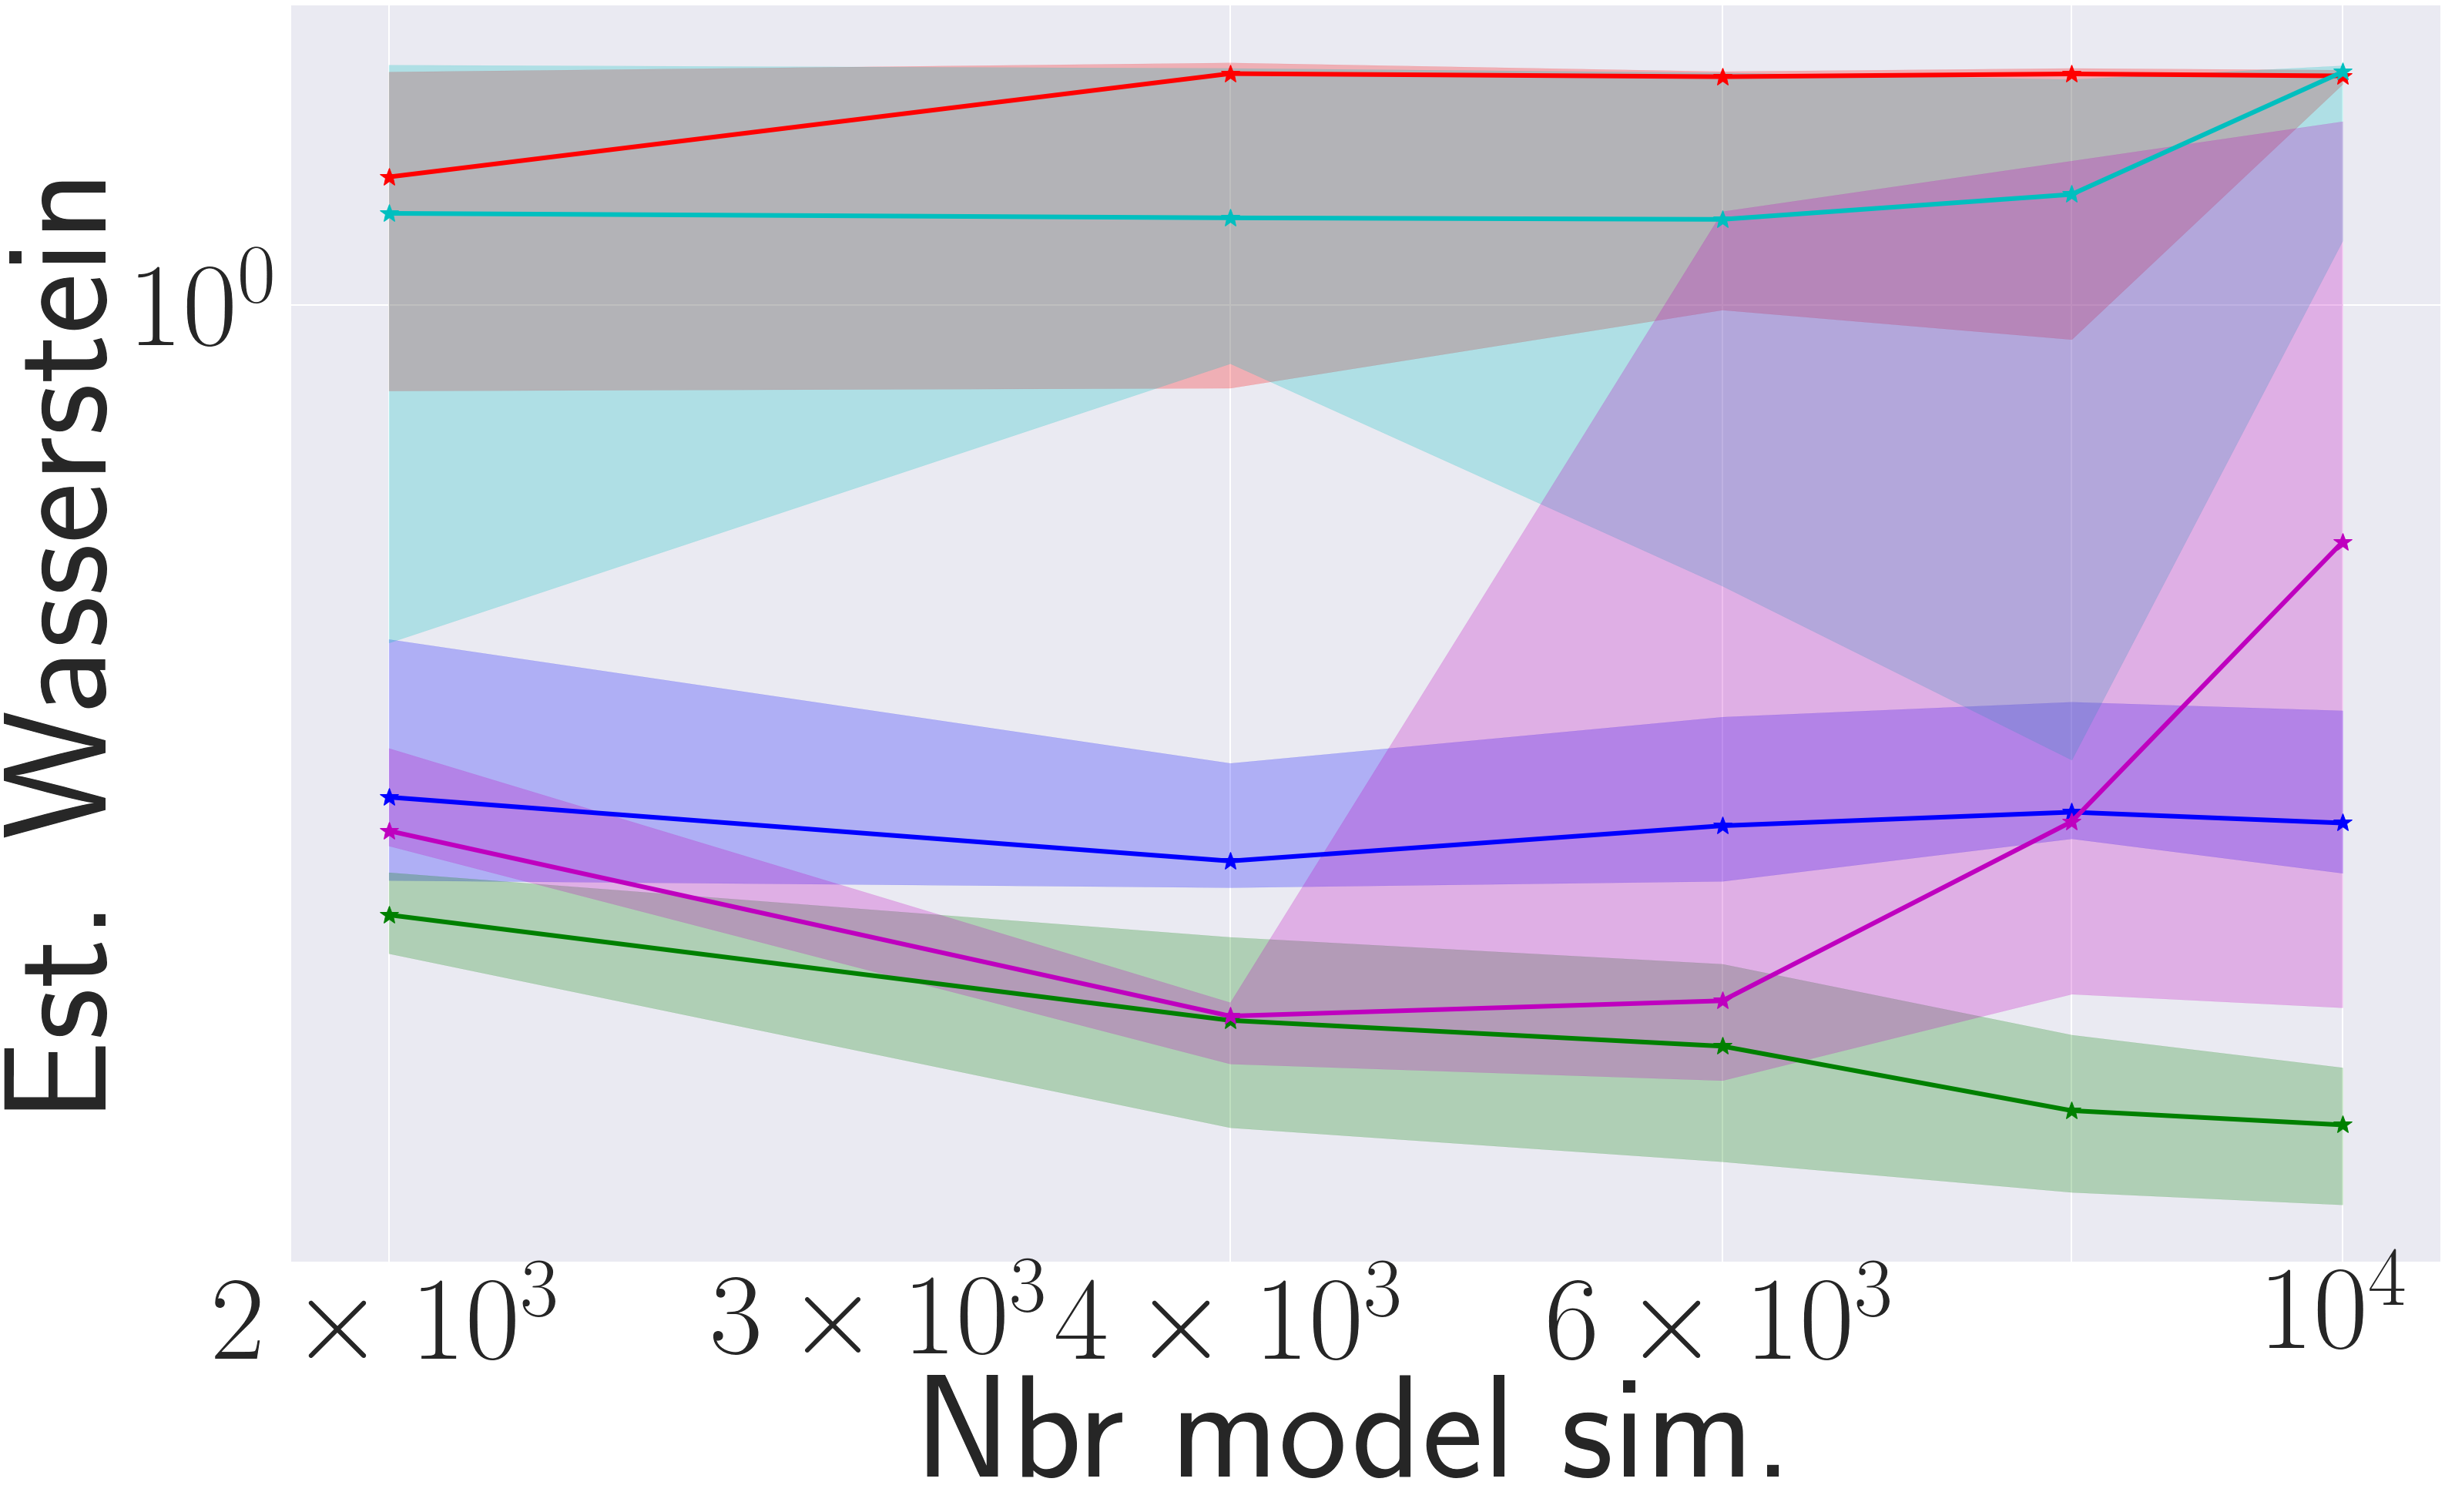

In [39]:
x = [2000,4000,6000,8000,10000]

upper_q = 0.75
lower_q = 0.25

fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)

ax.loglog(x,np.median(smcabc_post_emd,axis=1), color = "b", marker = "*", 
          label='SMC-ABC', markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(smcabc_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(smcabc_post_emd, [lower_q, upper_q],axis=1)[1,:], 
                 color ="b", alpha = 0.25)


ax.loglog(x,np.median(snl_post_emd,axis=1), color = "r", marker = "*", label='SNL',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snl_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snl_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "r", alpha = 0.25)

ax.loglog(x,np.median(snpe_c_post_emd,axis=1), color = "g", marker = "*", label='SNPE-C',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snpe_c_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snpe_c_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "g", alpha = 0.25)


ax.loglog(x,np.median(snre_b_post_emd,axis=1), color = "c", marker = "*", label='SNRE-B',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snre_b_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snre_b_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "c", alpha = 0.25)

ax.loglog(x,np.median(snpla_post_emd,axis=1), color = "m", marker = "*", label='SNPLA',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snpla_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snpla_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "m", alpha = 0.25)

#ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.xaxis.set_ticks(np.arange(1, 6, 1))

ax.set_xticks(x)
ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=155)
ax.tick_params(axis='both', which='minor', labelsize=150)
#ax.legend(prop={'size': 90}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Est. Wasserstein", fontsize=190)
ax.set_xlabel("Nbr model sim.", fontsize=190)

plt.savefig("./two_moons/fig/post_est_emd.pdf", bbox_inches='tight')


In [40]:
snpla_post_emd_wo_failes = []

for i in range(nbr_rounds):
    snpla_post_emd_wo_failes.append(snpla_post_emd[i,np.where(snpla_post_emd[i,:] < 1)].mean().round(4))
    
print("snpla-Flow (without cases that failed): " + str(snpla_post_emd_wo_failes))

# why is it not decreasing??

snpla-Flow (without cases that failed): [0.3581, 0.2122, 0.2175, 0.2362, 0.3421]


In [41]:
sum(snl_post_emd[4,:]>3)

0

In [42]:
sum(snpla_post_emd[4,:]>3)

0

(0.0, 5.0)

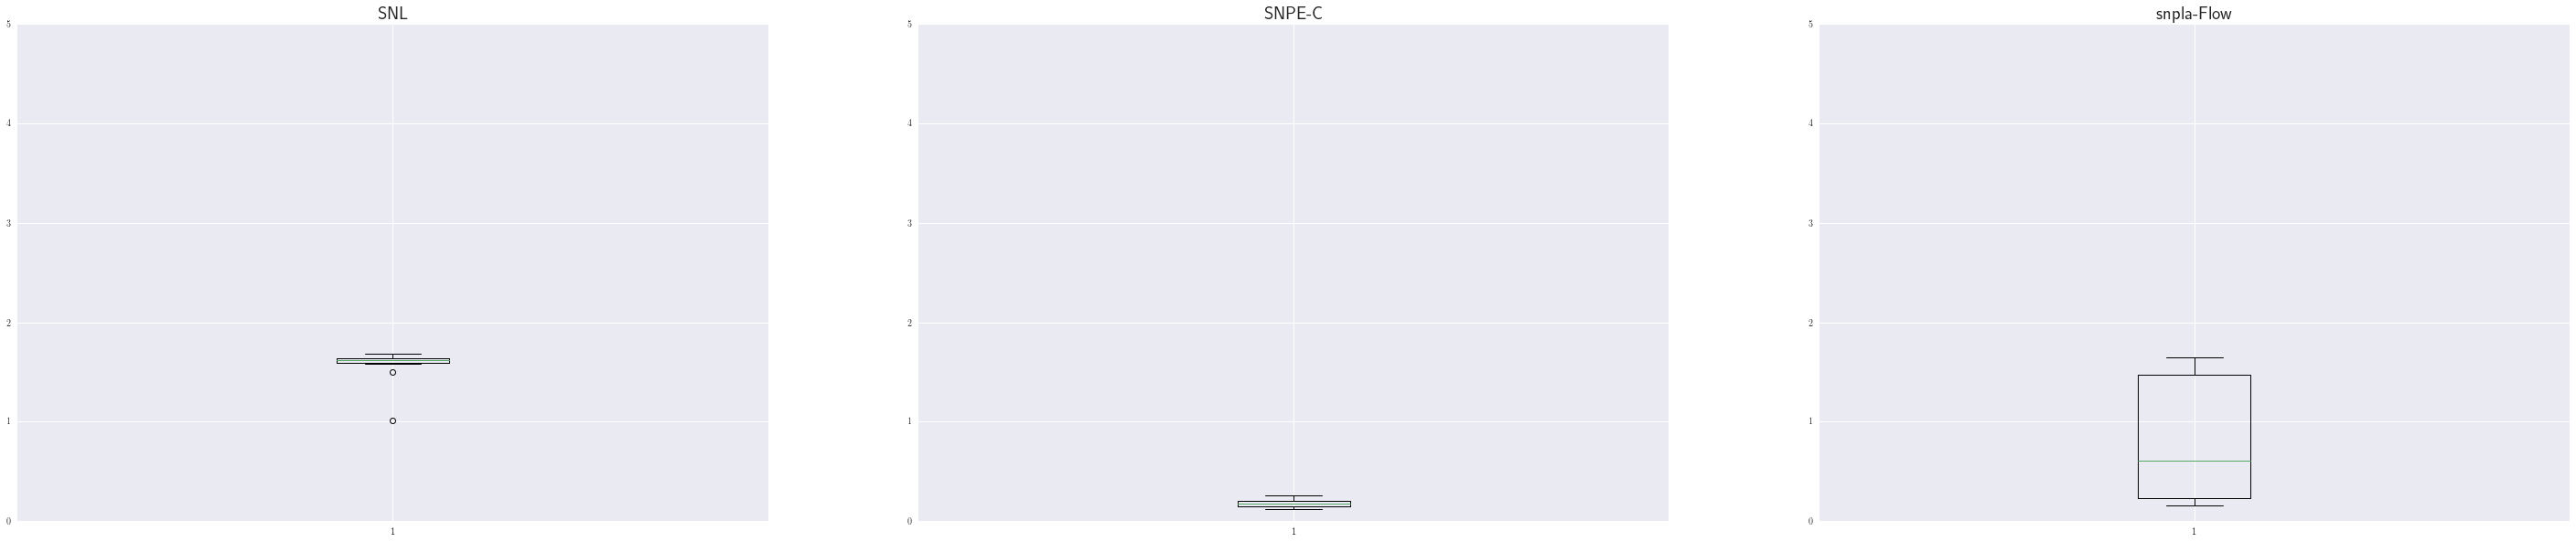

In [52]:
# deprecated
r = 5 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snl_post_emd[r-1,:])
ax2.boxplot(snpe_c_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,:])


ax1.set_title("SNL",fontsize=20)
ax2.set_title("SNPE-C",fontsize=20)
ax3.set_title("snpla-Flow",fontsize=20)

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([0,5])

(0.0, 5.0)

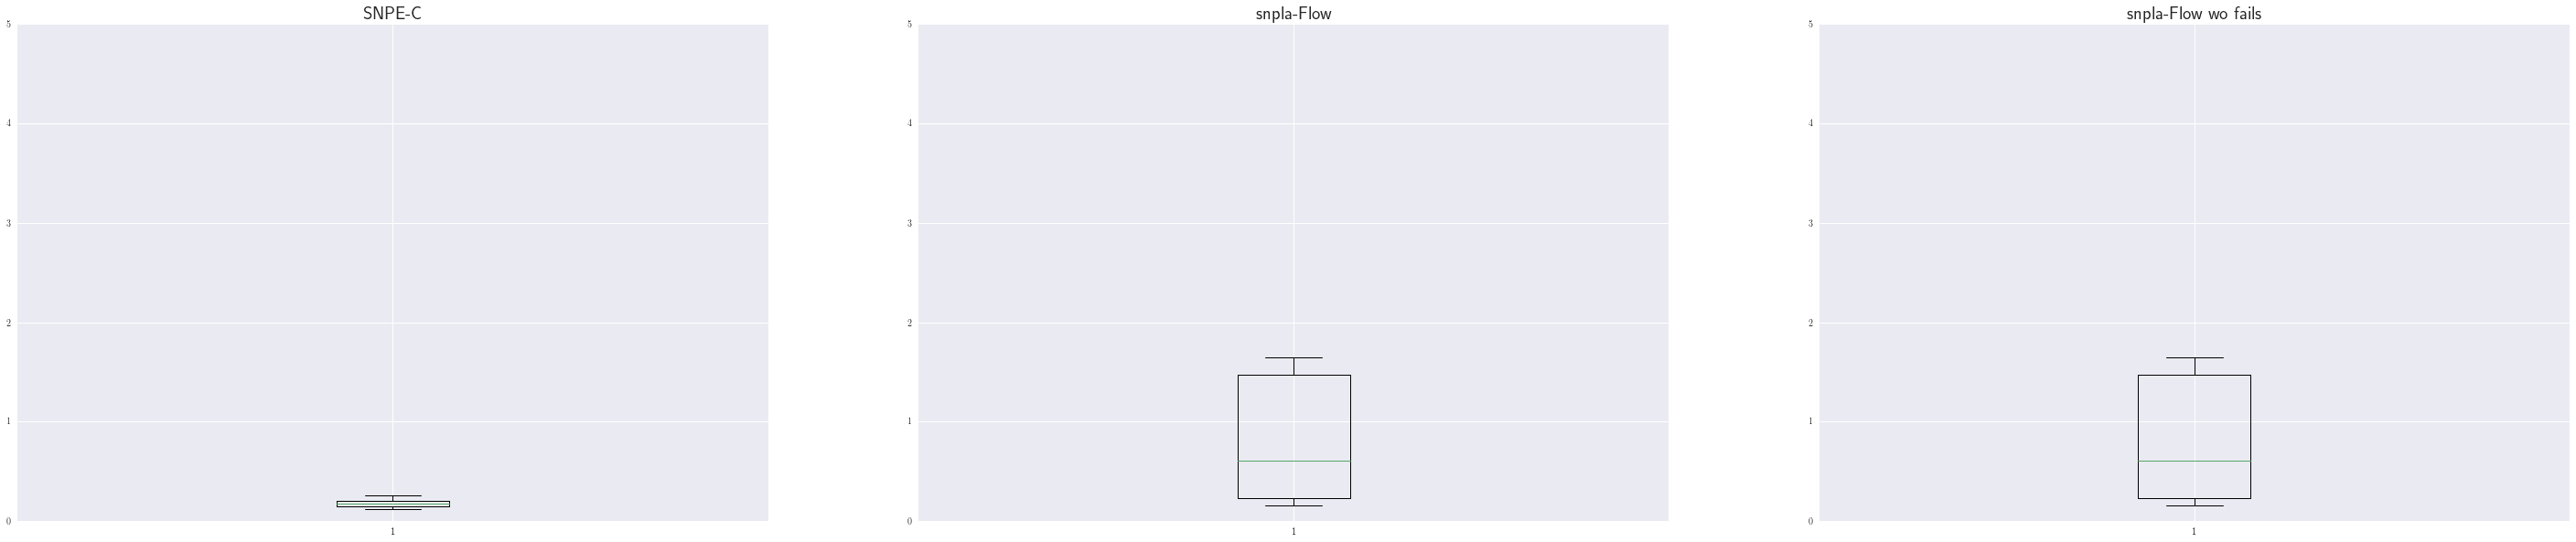

In [46]:
# deprecated

r = 5 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([0,5])


In [46]:
# deprecated

r = 4 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

(0, 3)

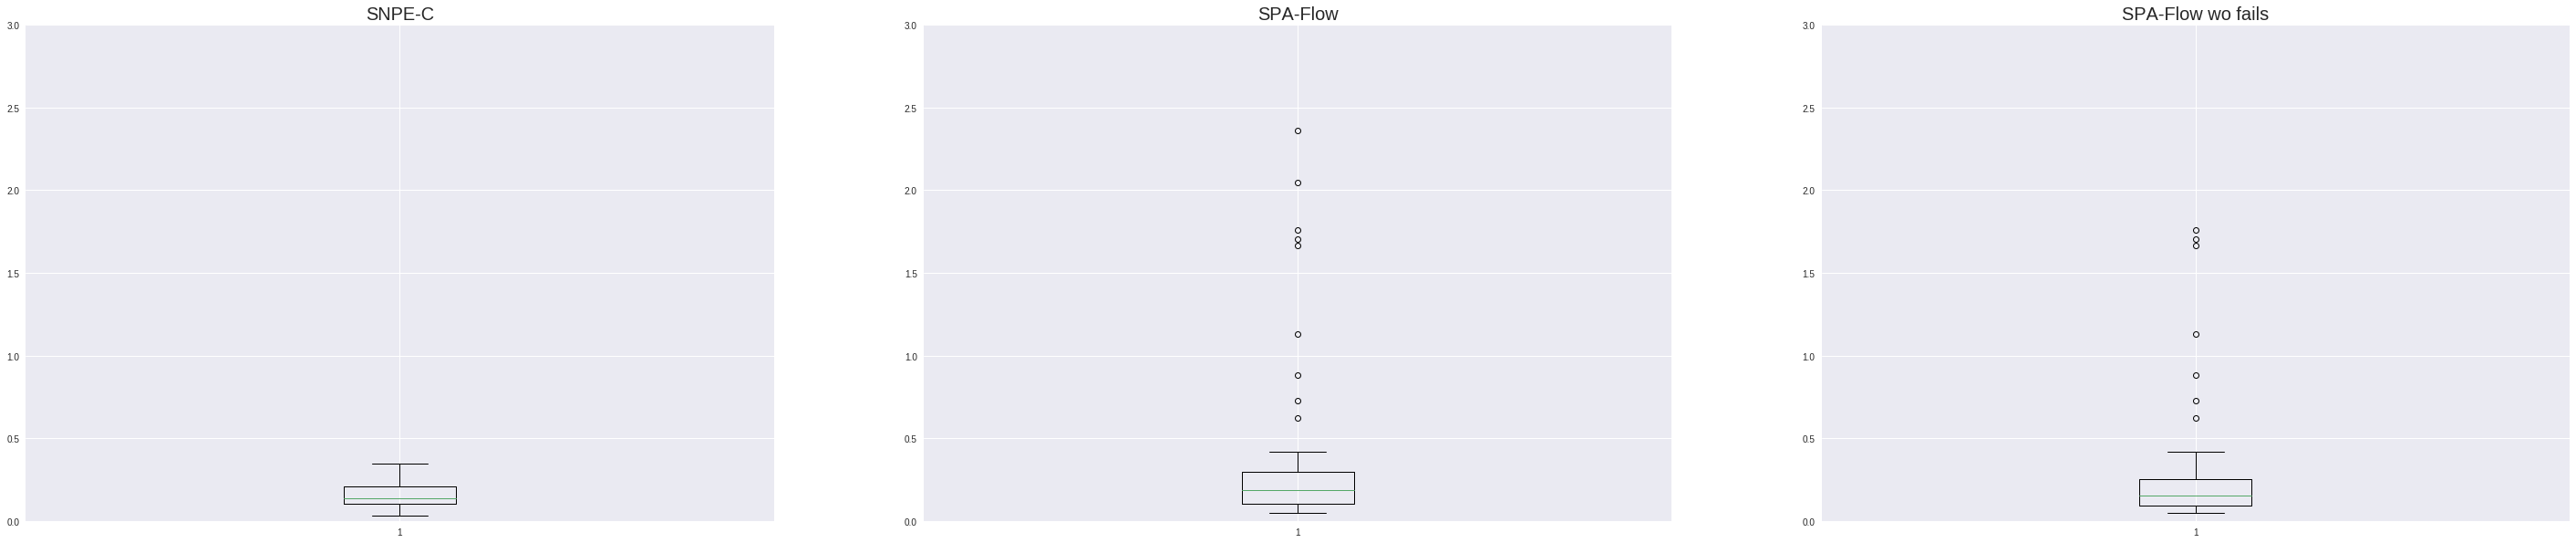

In [47]:

# deprecated

r = 3 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

In [48]:
r = 2 # round 
# deprecated

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

(0, 3)

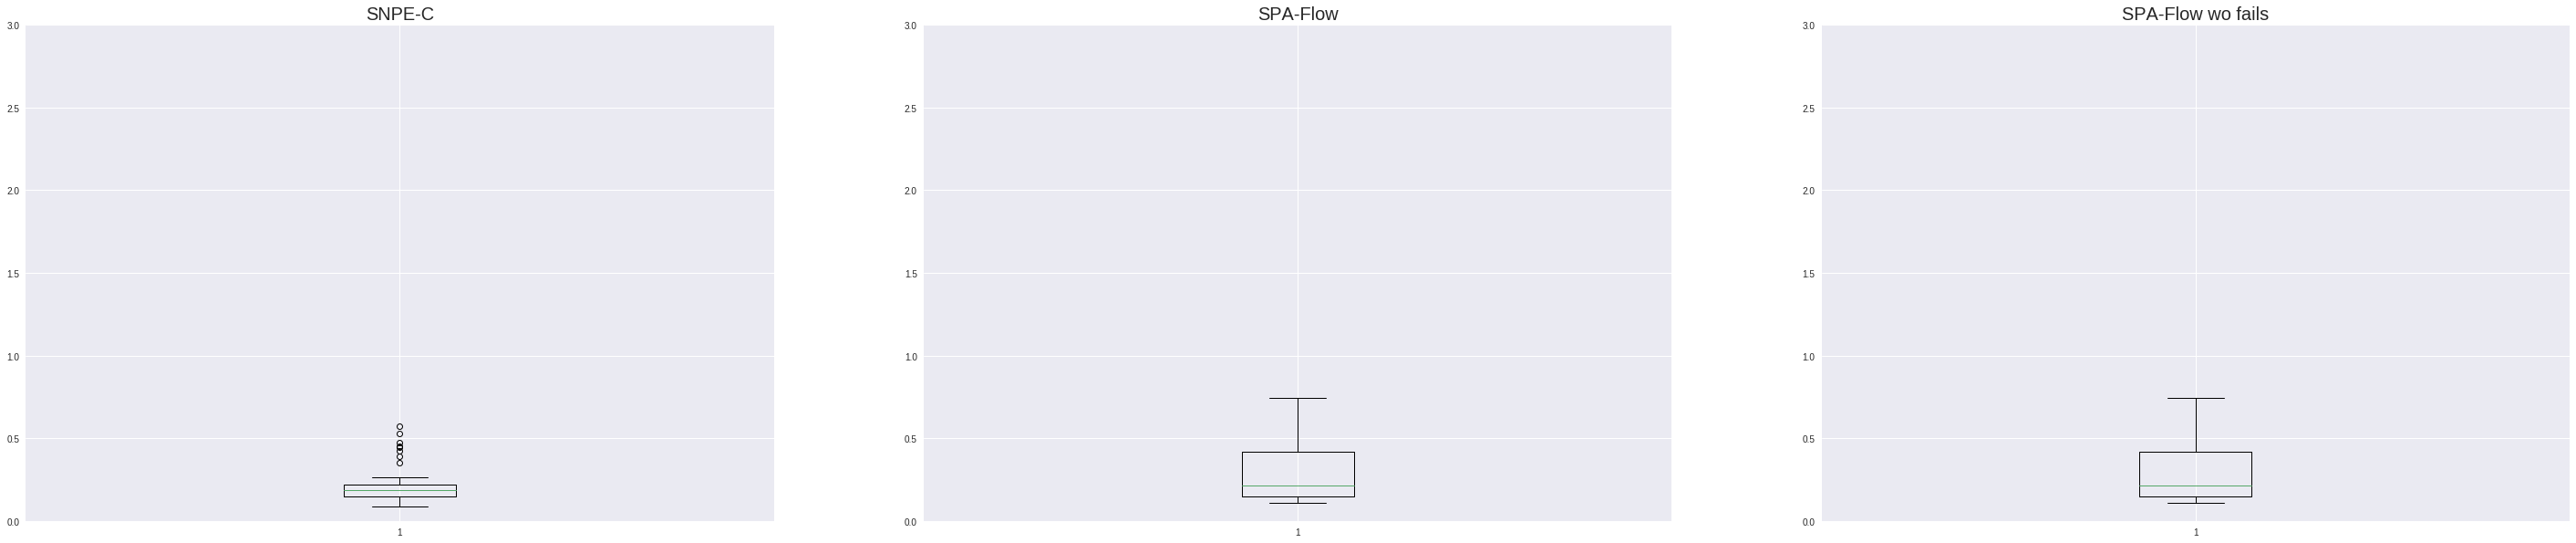

In [49]:
r = 1 # round 
# deprecated

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(snpla_post_emd[r-1,:])
ax3.boxplot(snpla_post_emd[r-1,np.where(snpla_post_emd[r-1,:] < 2)].reshape(-1))

ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("snpla-Flow",fontsize=20)
ax3.set_title("snpla-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

### Plotting - posterior

TypeError: subplots_adjust() got an unexpected keyword argument 'wsnplace'

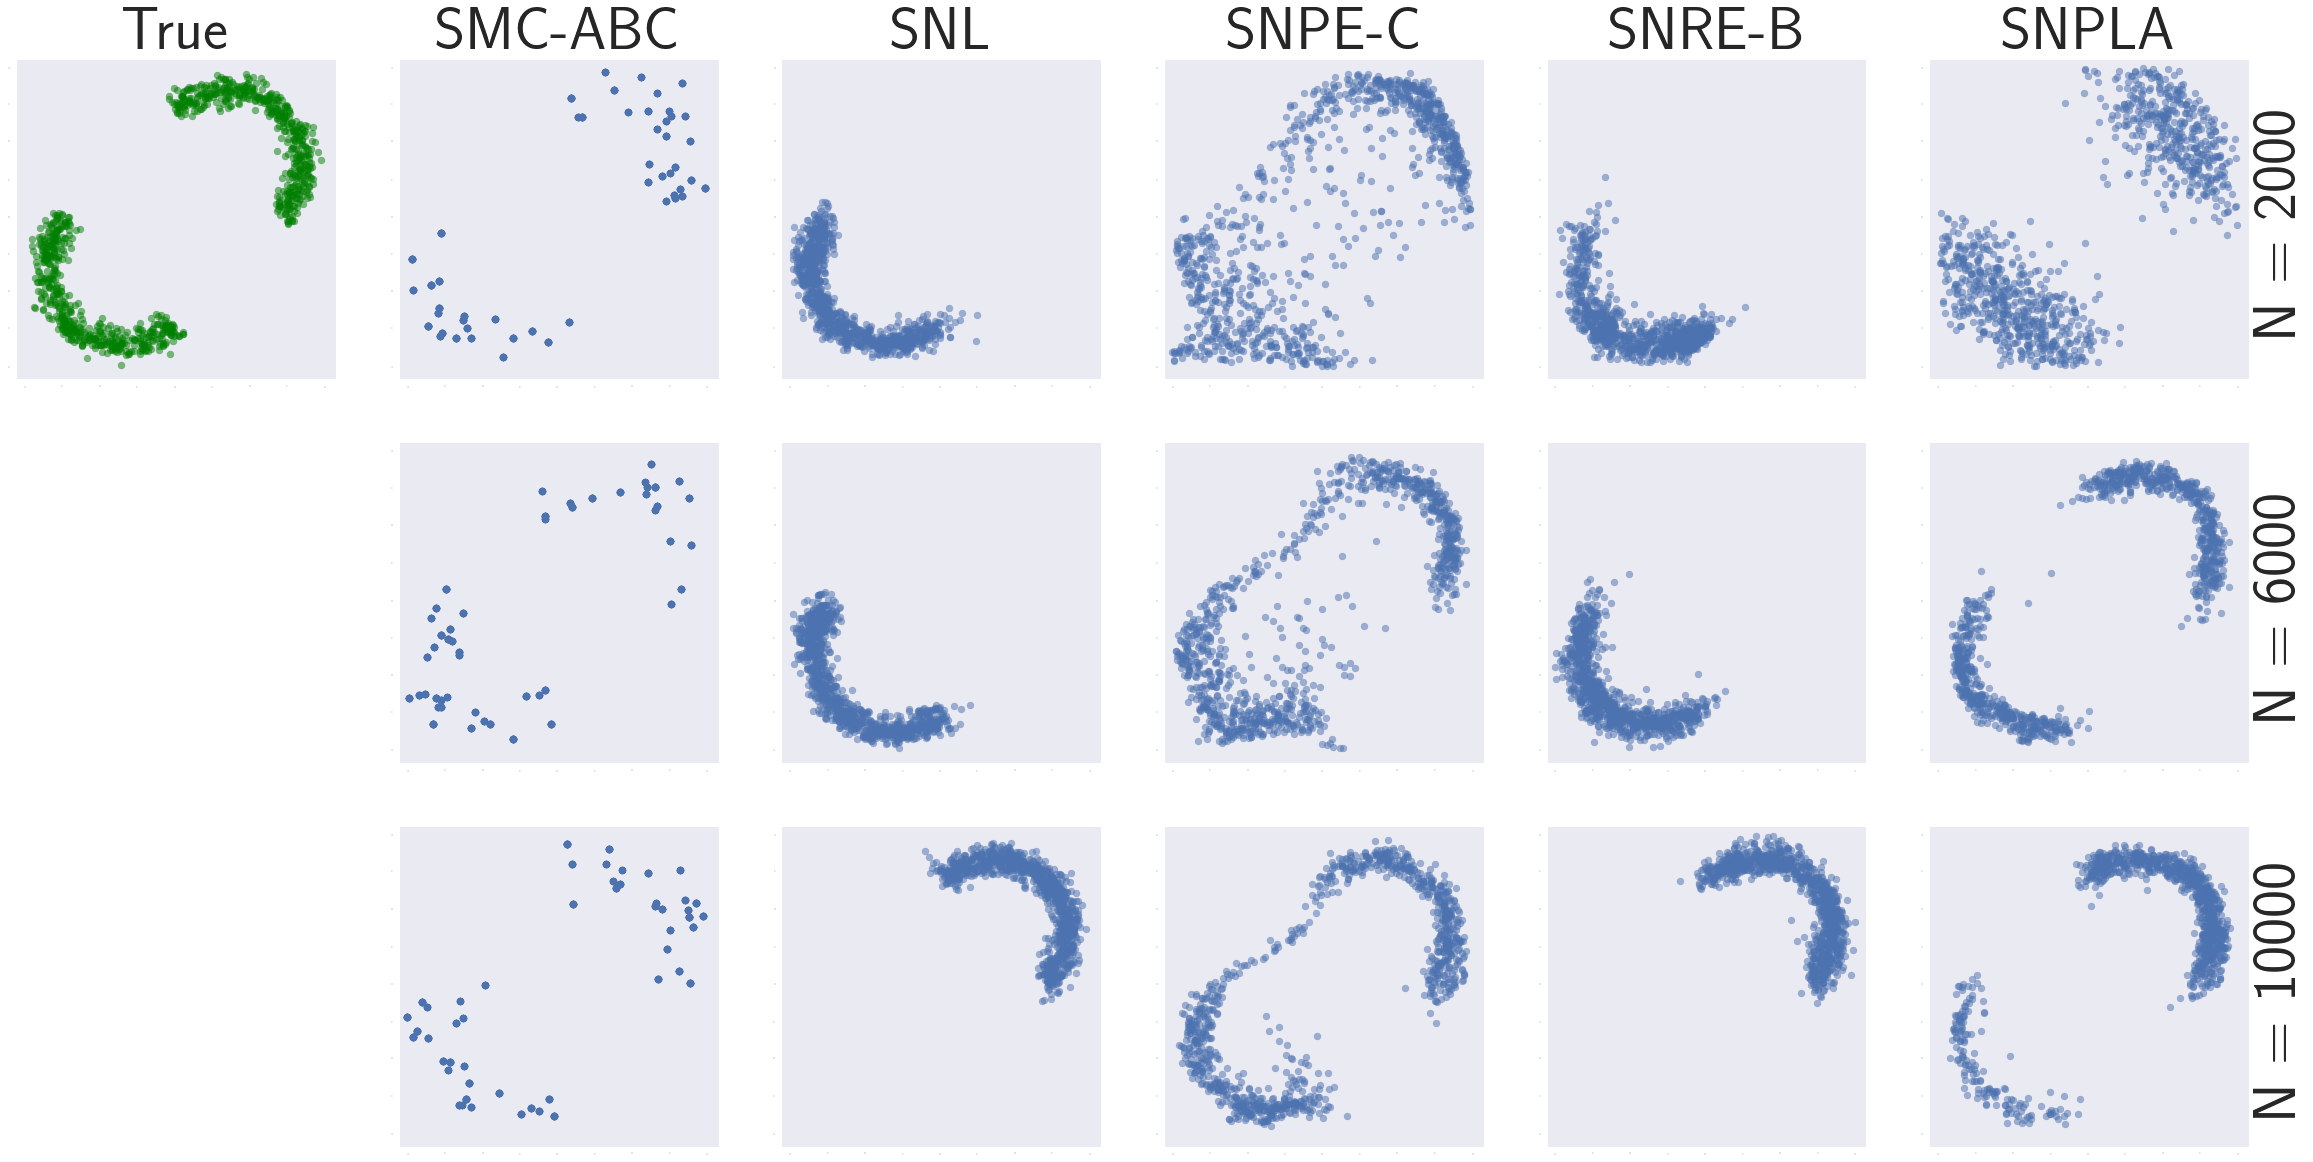

In [54]:
# plotting

import matplotlib.gridspec as gridspec

data_set = 6 # 9 good, 6 not so much

fig = plt.figure(figsize = (40,20))


# frist row 
ax1 = fig.add_subplot(3, 6, 1)
ax2 = fig.add_subplot(3, 6, 2)
ax3 = fig.add_subplot(3, 6, 3)
ax4 = fig.add_subplot(3, 6, 4)
ax5 = fig.add_subplot(3, 6, 5)
ax6 = fig.add_subplot(3, 6, 6)

ax7 = fig.add_subplot(3, 6, 8)
ax8 = fig.add_subplot(3, 6, 9)
ax9 = fig.add_subplot(3, 6, 10)
ax10 = fig.add_subplot(3, 6, 11)
ax11 = fig.add_subplot(3, 6, 12)

ax12 = fig.add_subplot(3, 6, 14)
ax13 = fig.add_subplot(3, 6, 15)
ax14 = fig.add_subplot(3, 6, 16)
ax15 = fig.add_subplot(3, 6, 17)
ax16 = fig.add_subplot(3, 6, 18)

ax1.scatter(analytical_post[:,0],analytical_post[:,1],color = "g", alpha = 0.5)

ax2.scatter(smcabc_post[0][data_set][:,0],smcabc_post[0][data_set][:,1], alpha = 0.5)
ax3.scatter(snl_post[0][data_set][:,0],snl_post[0][data_set][:,1], alpha = 0.5)
ax4.scatter(snpe_c_post[0][data_set][:,0],snpe_c_post[0][data_set][:,1], alpha = 0.5)
ax5.scatter(snre_b_post[0][data_set][:,0],snre_b_post[0][data_set][:,1], alpha = 0.5)
ax6.scatter(snpla_post[0][data_set][:,0],snpla_post[0][data_set][:,1], alpha = 0.5)

ax7.scatter(smcabc_post[2][data_set][:,0],smcabc_post[2][data_set][:,1], alpha = 0.5)
ax8.scatter(snl_post[2][data_set][:,0],snl_post[2][data_set][:,1], alpha = 0.5)
ax9.scatter(snpe_c_post[2][data_set][:,0],snpe_c_post[2][data_set][:,1], alpha = 0.5)
ax10.scatter(snre_b_post[2][data_set][:,0],snre_b_post[2][data_set][:,1], alpha = 0.5)
ax11.scatter(snpla_post[2][data_set][:,0],snpla_post[2][data_set][:,1], alpha = 0.5)

ax12.scatter(smcabc_post[-1][data_set][:,0],smcabc_post[-1][data_set][:,1], alpha = 0.5)
ax13.scatter(snl_post[-1][data_set][:,0],snl_post[-1][data_set][:,1], alpha = 0.5)
ax14.scatter(snpe_c_post[-1][data_set][:,0],snpe_c_post[-1][data_set][:,1], alpha = 0.5)
ax15.scatter(snre_b_post[-1][data_set][:,0],snre_b_post[-1][data_set][:,1], alpha = 0.5)
ax16.scatter(snpla_post[-1][data_set][:,0],snpla_post[-1][data_set][:,1], alpha = 0.5)

ax1.set_title("True",fontsize=60)
ax2.set_title("SMC-ABC",fontsize=60)
ax3.set_title("SNL",fontsize=60)
ax4.set_title("SNPE-C",fontsize=60)
ax5.set_title("SNRE-B",fontsize=60)
ax6.set_title("SNPLA",fontsize=60)

ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax7.set_xlim(ax1.get_xlim())
ax7.set_ylim(ax1.get_ylim())

ax8.set_xlim(ax1.get_xlim())
ax8.set_ylim(ax1.get_ylim())

ax9.set_xlim(ax1.get_xlim())
ax9.set_ylim(ax1.get_ylim())

ax10.set_xlim(ax1.get_xlim())
ax10.set_ylim(ax1.get_ylim())

ax11.set_xlim(ax1.get_xlim())
ax11.set_ylim(ax1.get_ylim())

ax12.set_xlim(ax1.get_xlim())
ax12.set_ylim(ax1.get_ylim())

ax13.set_xlim(ax1.get_xlim())
ax13.set_ylim(ax1.get_ylim())

ax14.set_xlim(ax1.get_xlim())
ax14.set_ylim(ax1.get_ylim())

ax15.set_xlim(ax1.get_xlim())
ax15.set_ylim(ax1.get_ylim())

ax16.set_xlim(ax1.get_xlim())
ax16.set_ylim(ax1.get_ylim())

ax6.set_ylabel(r'N = 2000',fontsize=60)
ax6.yaxis.set_label_position("right")

ax11.set_ylabel(r'N = 6000',fontsize=60)
ax11.yaxis.set_label_position("right")

ax16.set_ylabel(r'N = 10000',fontsize=60)
ax16.yaxis.set_label_position("right")

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13 , ax14,
          ax15, ax16]:
    
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.tick_params(axis='y', which='minor', labelsize=0)

    ax.tick_params(axis='x', which='major', labelsize=0)
    ax.tick_params(axis='x', which='minor', labelsize=0)

    ax.grid(False)
    
fig.subplots_adjust(wsnplace=0.01, hsnplace=0.01)

plt.savefig("./two_moons/fig/post_samples_" + str(data_set) + ".pdf", bbox_inches='tight')


### Calc emd for post pred and plot post pred

In [55]:
snl_post_pred_emd = np.zeros((seed_max))

for j in range(seed_max):
    snl_post_pred_emd[j] = calc_emd(analytical_post_pred,snl_post_pred[j])     

In [56]:
snpla_post_pred_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snpla_post_pred_emd[i,j] = calc_emd(analytical_post_pred,snpla_post_pred[i][j])         

0
1
2
3
4


In [57]:
print("SNL: " + str(snl_post_pred_emd.mean().round(4)))
print("snpla-Flow: " + str(snpla_post_pred_emd.mean(axis=1).round(4)))


SNL: 0.1195
snpla-Flow: [0.2344 0.1619 0.121  0.1114 0.1097]


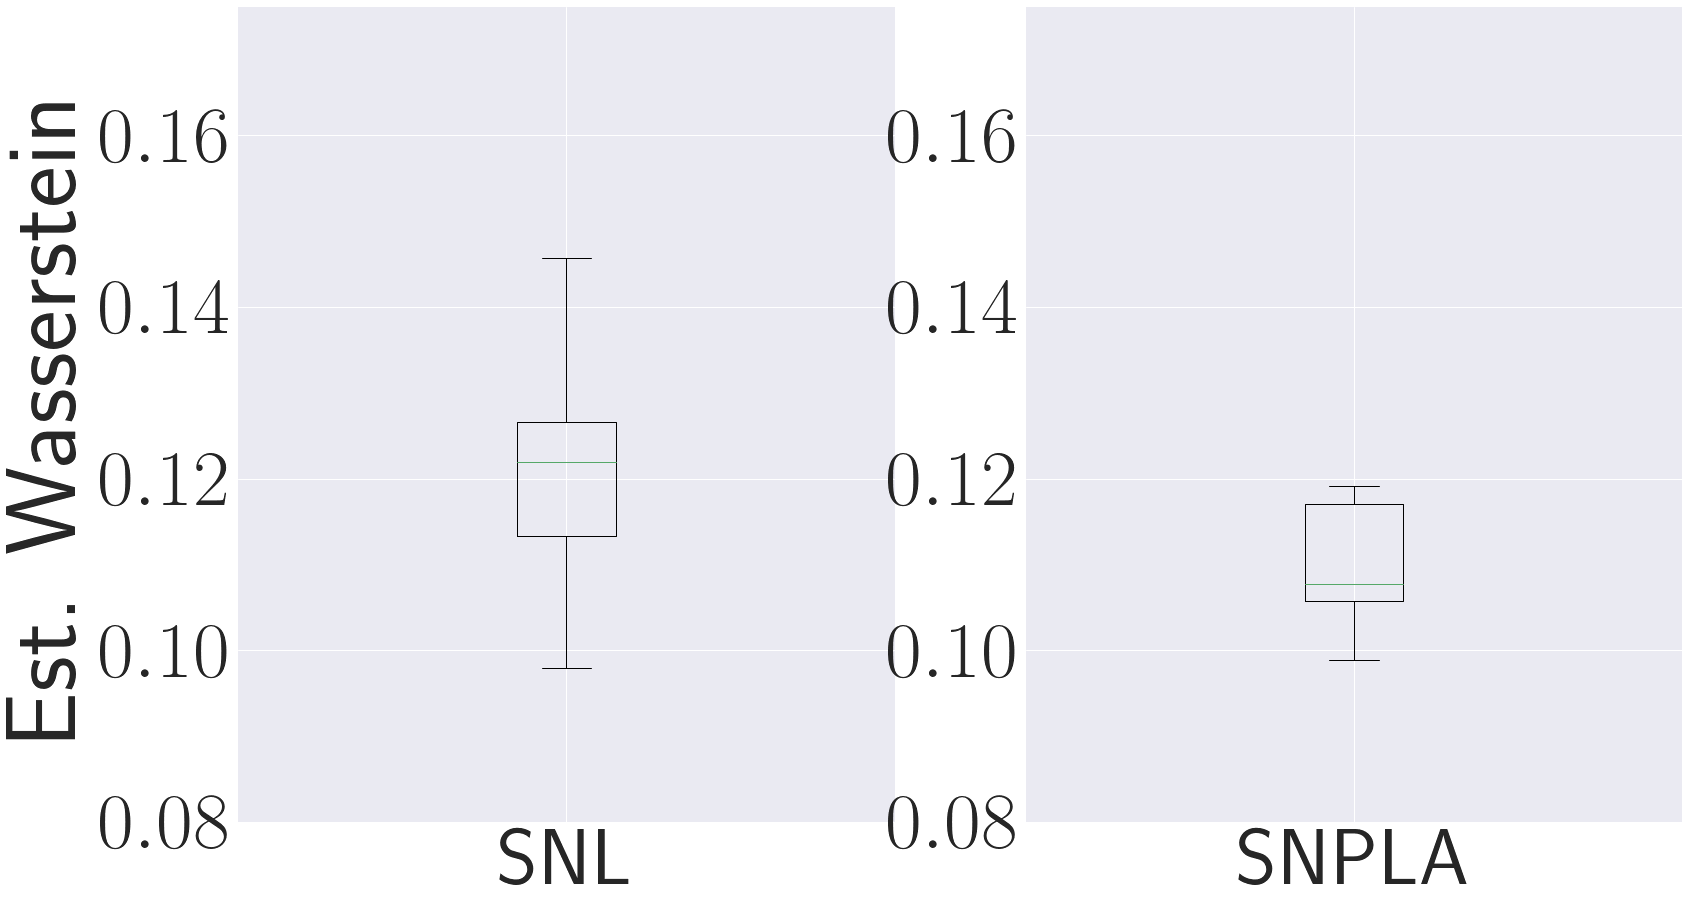

In [58]:
r = 5 # round 

fig = plt.figure(figsize = (40,15))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

ax1.boxplot(snl_post_pred_emd[:], labels = ["SNL"])
ax2.boxplot(snpla_post_pred_emd[r-1,:], labels = ["SNPLA"])

#ax1.set_title("SNL",fontsize=60)
#ax2.set_title("SNPLA",fontsize=60)

ax1.set_ylim([0.08,0.175])
ax2.set_ylim([0.08,0.175])

ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_ylabel("Est. Wasserstein", fontsize=100)


plt.savefig("./two_moons/fig/post_pred_emd_" + str(data_set) + "_.pdf",bbox_inches='tight')



In [59]:
np.quantile(snl_post_pred_emd[:], [0.5, 0.25, 0.75]).round(3)

array([0.122, 0.113, 0.127])

In [60]:
np.quantile(snpla_post_pred_emd[r-1,:], [0.5, 0.25, 0.75]).round(3)

array([0.108, 0.106, 0.117])

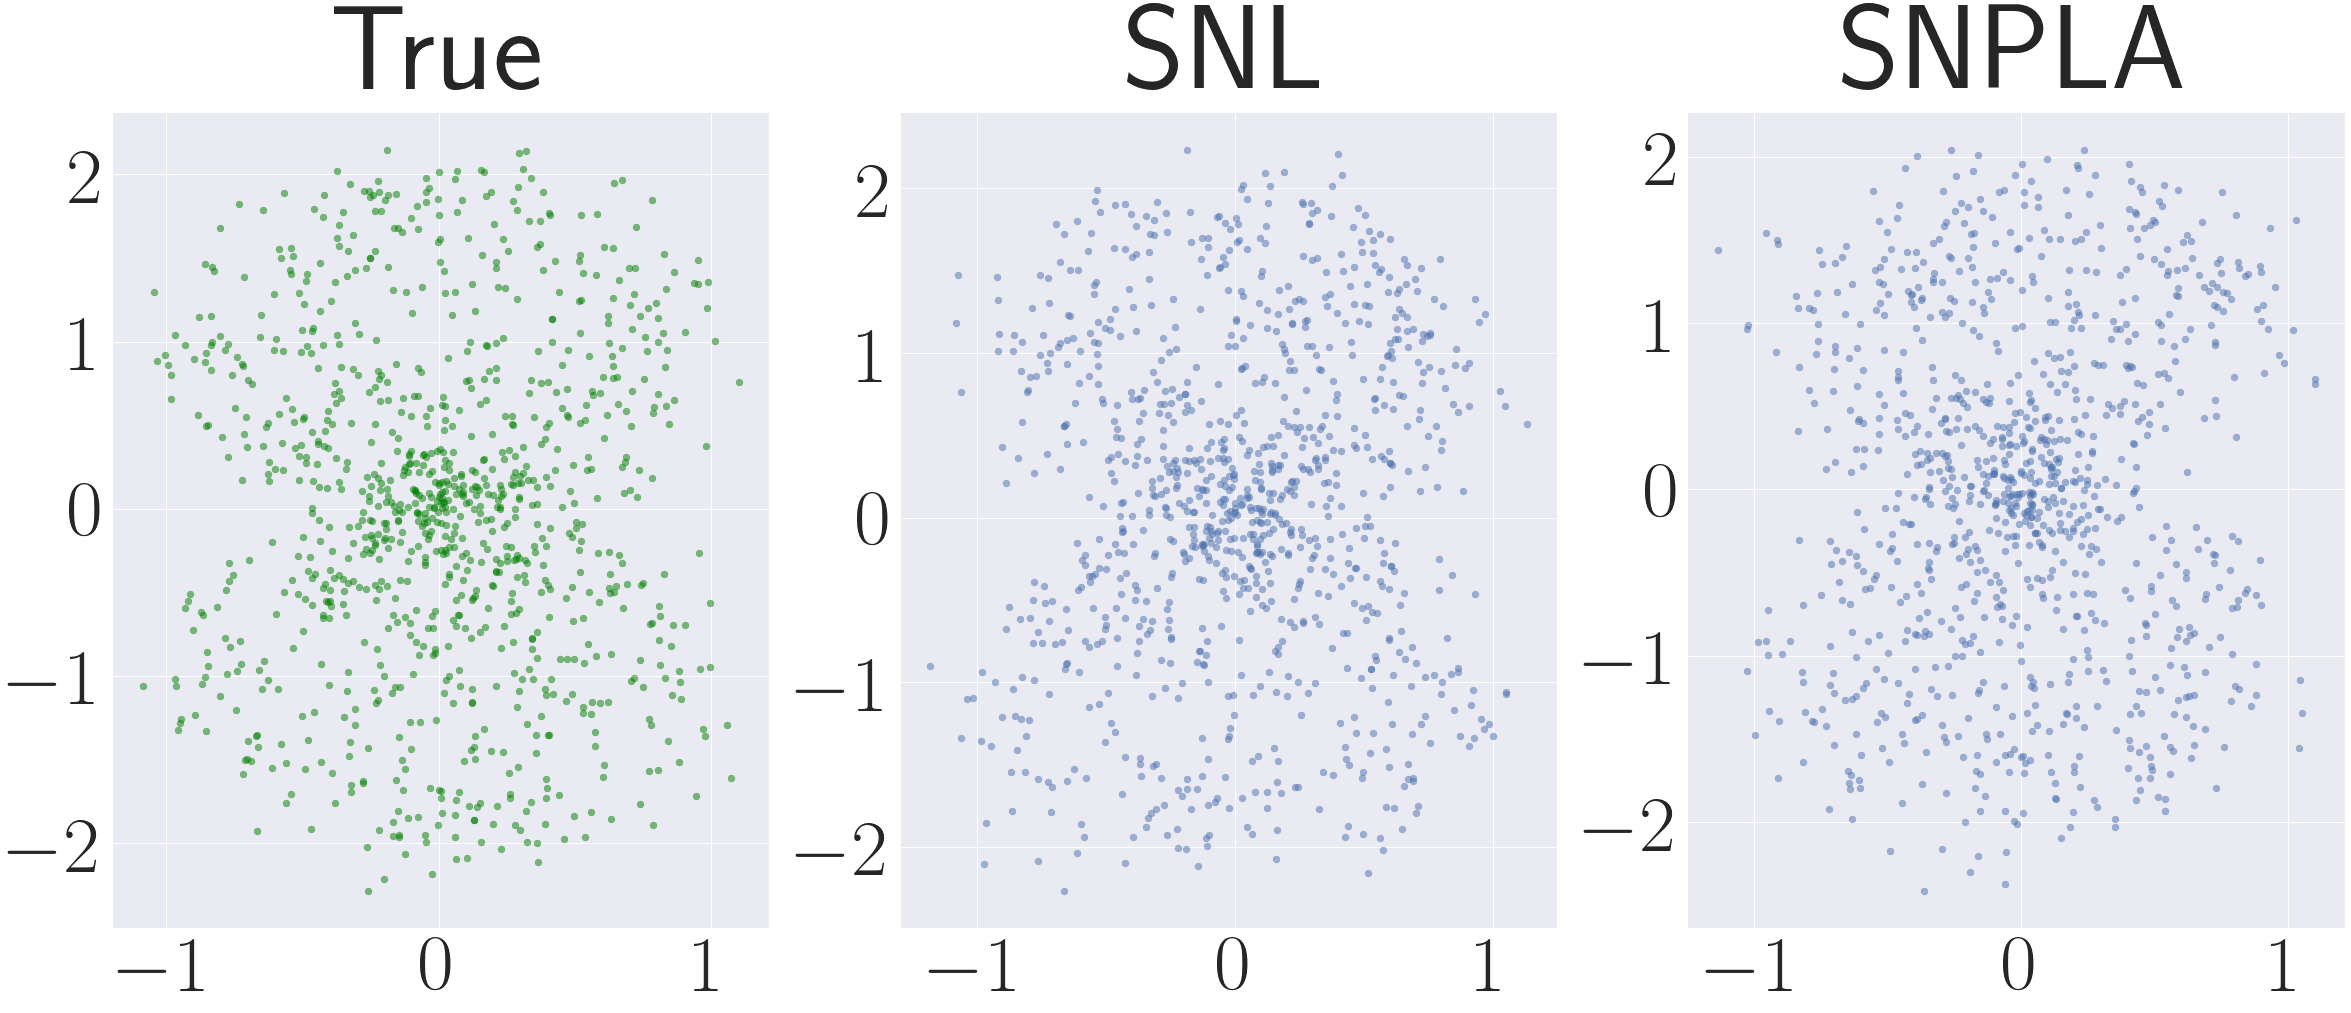

In [61]:
# plotting
data_set = 0

fig = plt.figure(figsize = (40,15))

# frist row 
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.scatter(analytical_post_pred[:,0],analytical_post_pred[:,1],color = "g", alpha = 0.5)
ax2.scatter(snl_post_pred[data_set][:,0],snl_post_pred[data_set][:,1], alpha = 0.5)
ax3.scatter(snpla_post_pred[4][data_set][:,0],snpla_post_pred[4][data_set][:,1], alpha = 0.5)


ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax3.tick_params(axis='both', which='major', labelsize=80)
ax3.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_title("True",fontsize=120)
ax2.set_title("SNL",fontsize=120)
ax3.set_title("SNPLA",fontsize=120)

plt.savefig("./two_moons/fig/post_pred_samples_" + str(data_set) + "_.pdf",bbox_inches='tight')

